In [4]:
import pandas as pd
import numpy as np
full_data = pd.read_excel(r'C:\work\Data_analyst\Test\Lenta\Тестовое задание_аналитик.xlsx')

In [135]:
import re
import plotly.express as px
import numpy as np
import seaborn as sns

In [33]:
full_data = full_data.rename(columns={'Год':'year', 'Месяц':'month', 'Город':'state', 'Продажи':'number_of_sales'})

In [35]:
# отберем все продукты, похожие на йогурт 
full_data['yogurt'] = full_data.SKU.str.contains('огурт', flags=re.IGNORECASE, regex=True)

In [36]:
df_yogurt = full_data.loc[full_data['yogurt'] == True]
df_yogurt = df_yogurt.drop('yogurt', axis = 1)

In [37]:
df_yogurt

,year,month,state,number_of_sales,SKU
0,2017,3,Кемерово,626,"Йогурт ЧУДО молочный Fresh персик-маракуйя 2,5..."
1,2017,3,Ачинск,38,Продукт йогуртный FRUTTIS паст. банан-клуб/мул...
2,2017,5,Бийск,276,Йогурт АЛТАЙСКАЯ БУРЁНКА фруктово-ягодный с че...
3,2016,3,Иркутск,288,"Йогурт БОЛЬШАЯ КРУЖКА черника-ежевика 1,9% без..."
4,2017,3,Омск,2520,Йогурт ЧУДО питьевой фруктовый малина-ежевика ...
...,...,...,...,...,...
41709,2016,4,Кемерово,1894,Йогурт АЛТАЙСКАЯ БУРЁНКА фруктово-ягодный с об...
41710,2016,5,Новосибирск,6727,Биойогурт BIOБАЛАНС клубника земляника/персик ...
41712,2016,5,Юрга,54,Биойогурт DANONE Активиа термостатный двухсл с...
41713,2017,4,Братск,213,"Йогурт ПРОСТОКВАШИНО густой клубника 2,5% ст. ..."


In [42]:
# смотрим распределение величин: есть данные только за месяцы 1-5, причем годы разные (2016 и 2017), 
# среднее количество покупок одного продукта в месяц - 1932, минимальное - 10, максимальное - 69981
df_yogurt.describe()

,year,month,number_of_sales
count,30195.000000,30195.000000,30195.000000
mean,2016.504355,3.040040,1932.427223
std,0.499989,1.414946,3053.651630
min,2016.000000,1.000000,10.000000
25%,2016.000000,2.000000,294.000000
50%,2017.000000,3.000000,876.000000
75%,2017.000000,4.000000,2322.000000
max,2017.000000,5.000000,69981.000000


In [86]:
# смотрим распределение количества продаж в разбивке по городу: 
# в Юрге количество купленных товаров в средне меньше всего, в Новосибирске - болше всего
df_yogurt.groupby('state').number_of_sales.describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
Новосибирск,2396.0,5371.146494,6000.548124,14.0,1351.00,3370.0,7362.25,69981.0
Омск,2503.0,3521.044347,3778.701468,11.0,1026.50,2506.0,4777.50,42971.0
Красноярск,2488.0,3344.574357,3966.617160,10.0,939.75,2124.0,4425.25,62832.0
Иркутск,2276.0,2245.655536,2463.346552,13.0,565.50,1539.0,3029.75,26992.0
Кемерово,2484.0,2097.410628,2415.158084,11.0,580.75,1371.0,2738.25,27124.0
Барнаул,2489.0,1913.579349,2106.962037,10.0,485.00,1368.0,2503.00,21858.0
Новокузнецк,2590.0,1600.883398,1879.321070,10.0,437.00,1059.0,2087.50,22182.0
Томск,2456.0,1559.833469,1552.433837,11.0,442.00,1154.5,2158.00,18770.0
Братск,2134.0,849.305061,803.033305,10.0,329.25,619.5,1090.75,6922.0


In [53]:
# в среднем больше всего покупают Йогурт DANONE Даниссимо фантазия хрустящие шарики в шоколаде 6,9%
df_yogurt.groupby('SKU').number_of_sales.describe().sort_values(by = 'mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
SKU,,,,,,,,
"Йогурт DANONE Даниссимо фантазия хрустящие шарики в шоколаде 6,9% без змж (Россия) 105г",129.0,14742.643411,14433.160374,743.0,3578.00,10649.0,20735.00,69981.0
"Йогурт ЛУЖАЙКИНО фруктовый черника 2,5% LP без змж (Россия) 450г",10.0,10509.200000,4786.396181,6368.0,7810.75,9202.0,11110.50,23154.0
"Йогурт DANONE Даниссимо Фантазия Ягодные шарики 6,9% без змж (Россия) 105г",129.0,10203.627907,9446.797070,550.0,3037.00,7293.0,13984.00,47276.0
"Йогурт ЛУЖАЙКИНО фруктовый клубника 2,5% LP без змж (Россия) 450г",10.0,9770.900000,1894.930749,6584.0,8721.25,9447.0,11300.75,12873.0
"Йогурт ПРОСТОКВАШИНО белый классический 2,7% ст. без змж (Россия) 480г",129.0,6716.860465,5562.611359,205.0,1851.00,6332.0,9735.00,24367.0
...,...,...,...,...,...,...,...,...
"Йогурт БОЛЬШАЯ КРУЖКА Чернослив и злаки 2,5% (Россия) 500г",8.0,65.625000,51.397436,15.0,32.75,48.5,81.50,148.0
"Йогурт ДМЗ Лето питьевой фруктовый персик 2,5% п/б без змж (Россия) 300г",6.0,62.000000,21.052316,41.0,47.50,59.5,67.00,99.0
"Йогурт СВЕЖЕЕ ЗАВТРА вишня 2,5% (Россия) 330г",3.0,51.666667,44.230457,19.0,26.50,34.0,68.00,102.0


In [99]:
# найдем самые популярные продукты в городах:
# опять Йогурт DANONE Даниссимо фантазия хрустящие шарики!!!

popular_SKU = df_yogurt.groupby(['state', 'SKU'], as_index = False) \
    .agg({'number_of_sales':sum})\
    .sort_values(['state', 'number_of_sales'], ascending=[True, False]) \
    .groupby('state')\
    .head(1) \
    .rename(columns = {'SKU': 'popular_SKU', 'number_of_sales': 'number_of_sales_popular' } )
popular_SKU

,state,popular_SKU,number_of_sales_popular
108,Ачинск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,21720
405,Барнаул,Йогурт DANONE Даниссимо фантазия хрустящие шар...,145763
721,Бийск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,25245
1022,Братск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,34680
1306,Иркутск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,144461
1593,Кемерово,Йогурт DANONE Даниссимо фантазия хрустящие шар...,180332
1910,Красноярск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,316114
2223,Новокузнецк,Йогурт DANONE Даниссимо фантазия хрустящие шар...,148487
2554,Новосибирск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,417131
2894,Омск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,286308


In [100]:
# найдем самые непопулярные продукты в городах: в каждом городе - разные (нужна доп реклама, акции?)

unpopular_SKU = df_yogurt.groupby(['state', 'SKU'], as_index = False) \
    .agg({'number_of_sales':sum})\
    .sort_values(['state', 'number_of_sales'], ascending=[True, True]) \
    .groupby('state')\
    .head(1) \
    .rename(columns = {'SKU': 'unpopular_SKU', 'number_of_sales': 'number_of_sales_unpopular'} )
unpopular_SKU

,state,unpopular_SKU,number_of_sales_unpopular
38,Ачинск,Биойогурт DANONE обог. ActiRegularis Активиа D...,12
517,Барнаул,Йогурт САВУШКИН ПРОДУКТ с бифидобакт. персик 2...,29
686,Бийск,"Биойогурт ЛЕНТА Яблоко-корица 1,5 (Россия) 290г",19
1128,Братск,Йогурт ЯНТА пит.с лесн.яг. и нат.оксидантами о...,33
1398,Иркутск,"Йогурт СВЕЖЕЕ ЗАВТРА вишня 2,5% (Россия) 330г",34
1659,Кемерово,"Йогурт БОЛЬШАЯ КРУЖКА Чернослив и злаки 2,5% (...",15
2024,Красноярск,"Йогурт СВЕЖЕЕ ЗАВТРА черника 2,5% без змж (Рос...",42
2287,Новокузнецк,"Йогурт БОЛЬШАЯ КРУЖКА Чернослив и злаки 2,5% (...",26
2677,Новосибирск,"Йогурт СВЕЖЕЕ ЗАВТРА вишня 2,5% (Россия) 330г",19
2888,Омск,"Йогурт BE LIVE Персик-Груша-Злаки 1,5% (Россия...",81


In [91]:
# посчитаем число уникальных товаров в каждм городе

unique_SKU_df = df_yogurt.groupby('state', as_index = False) \
    .agg({'SKU' : pd.Series.nunique}) \
    .rename(columns = {'SKU': 'unique_SKU'} )

In [188]:
# посчитаем общее число продаж товаров в каждм городе

total_sales_df = df_yogurt.groupby('state', as_index = False) \
    .agg({'number_of_sales' : sum}) \
    .rename(columns = {'number_of_sales': 'total_sales'} )

In [107]:
result_yogurt = popular_SKU.merge(unpopular_SKU, on = 'state')\
    .merge(unique_SKU_df, on = 'state') \
    .merge(total_sales_df, on = 'state') 

In [191]:
# popular_sales_score - доля продаж самого популярного продукта не превышает 4%
result_yogurt['popular_sales_score'] = (result_yogurt.number_of_sales_popular/result_yogurt.total_sales).mul(100).round(1)

In [192]:
result_yogurt

,state,popular_SKU,number_of_sales_popular,unpopular_SKU,number_of_sales_unpopular,unique_SKU,total_sales,popular_sales_score
0,Ачинск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,21720,Биойогурт DANONE обог. ActiRegularis Активиа D...,12,294,730361,3.0
1,Барнаул,Йогурт DANONE Даниссимо фантазия хрустящие шар...,145763,Йогурт САВУШКИН ПРОДУКТ с бифидобакт. персик 2...,29,317,4762899,3.1
2,Бийск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,25245,"Биойогурт ЛЕНТА Яблоко-корица 1,5 (Россия) 290г",19,303,817924,3.1
3,Братск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,34680,Йогурт ЯНТА пит.с лесн.яг. и нат.оксидантами о...,33,273,1812417,1.9
4,Иркутск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,144461,"Йогурт СВЕЖЕЕ ЗАВТРА вишня 2,5% (Россия) 330г",34,295,5111112,2.8
5,Кемерово,Йогурт DANONE Даниссимо фантазия хрустящие шар...,180332,"Йогурт БОЛЬШАЯ КРУЖКА Чернослив и злаки 2,5% (...",15,316,5209968,3.5
6,Красноярск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,316114,"Йогурт СВЕЖЕЕ ЗАВТРА черника 2,5% без змж (Рос...",42,315,8321301,3.8
7,Новокузнецк,Йогурт DANONE Даниссимо фантазия хрустящие шар...,148487,"Йогурт БОЛЬШАЯ КРУЖКА Чернослив и злаки 2,5% (...",26,325,4146288,3.6
8,Новосибирск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,417131,"Йогурт СВЕЖЕЕ ЗАВТРА вишня 2,5% (Россия) 330г",19,336,12869267,3.2
9,Омск,Йогурт DANONE Даниссимо фантазия хрустящие шар...,286308,"Йогурт BE LIVE Персик-Груша-Злаки 1,5% (Россия...",81,318,8813174,3.2


Text(0.5, 1.0, 'Количество уникальных товаров, продаваемых в городах')

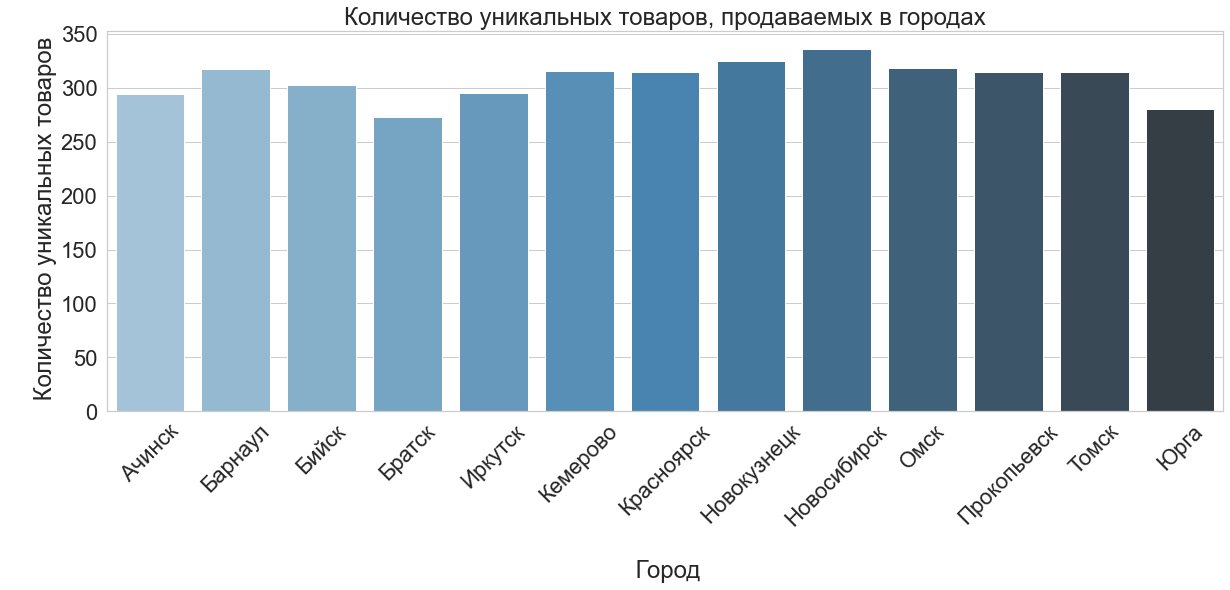

In [184]:
ax = sns.barplot(x="state", y="unique_SKU", data=result_yogurt,
                 palette="Blues_d")
ax.set_xticklabels(labels=result_yogurt.state,rotation=45)
ax.set_ylabel('\n Количество уникальных товаров')
ax.set_xlabel('\n Город')
ax.set_title('Количество уникальных товаров, продаваемых в городах')

In [120]:
# посмотрим динамику продаж по городам в зависимости от месяца

sales_2016 = df_yogurt.query('year==2016').groupby(['state', 'month'], as_index=False).agg({'number_of_sales' : sum})
sales_2016

,state,month,number_of_sales
0,Ачинск,1,52122
1,Ачинск,2,60444
2,Ачинск,3,82289
3,Ачинск,4,67696
4,Ачинск,5,84881
...,...,...,...
60,Юрга,1,49195
61,Юрга,2,56485
62,Юрга,3,62076
63,Юрга,4,48692


In [193]:
# График в plotly
fig = px.line(sales_2016, x="month", y="number_of_sales", color="state", title='Динамика продаж по городам в 2016 году')

fig.show()

<ipython-input-174-ca1f17995c22>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



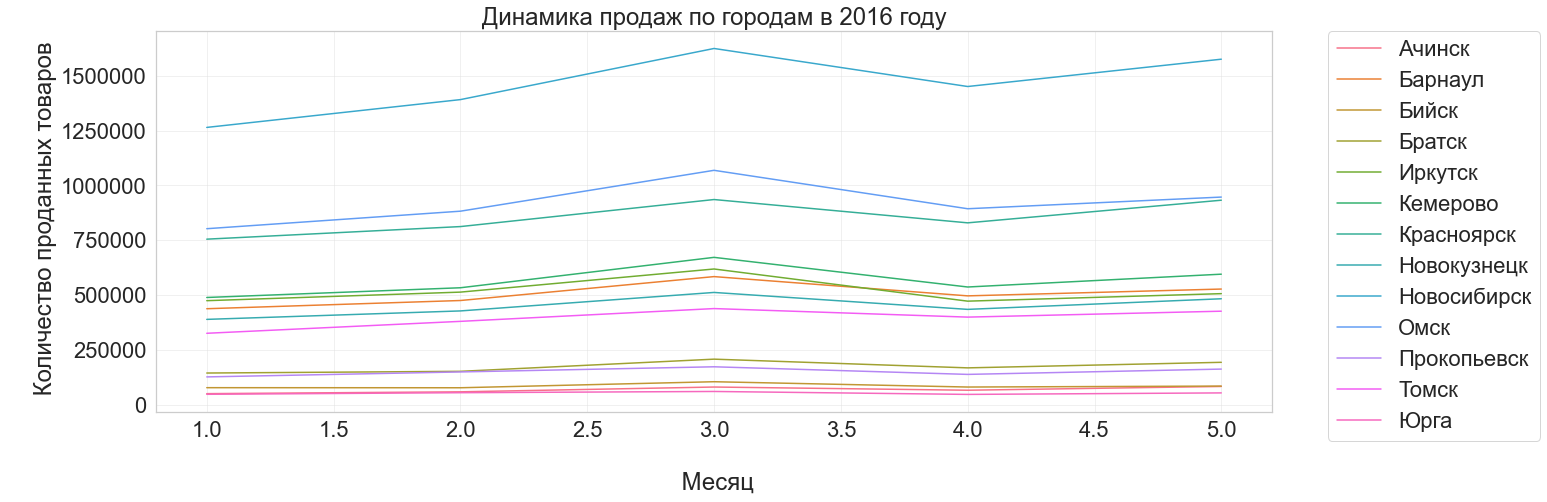

In [174]:
# График в seaborn
ax = sns.lineplot(x="month", y="number_of_sales",
             hue="state",
             data=sales_2016)
ax.set_title('Динамика продаж по городам в 2016 году')
ax.set_ylabel('\n Количество проданных товаров')
ax.set_xlabel('\n Месяц')
y_labels = [str(int(i)) for i in ax.get_yticks()]
ax.set_yticklabels(y_labels)
ax.grid(True, color='#e2e2e2', alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)